- 딥러닝 기반 자연어 처리
  - 트랜스퍼 러닝
   - 특정 타스크를 학습한 모델을 다른 타스크 수행에 재사용하는 기법   
  - 업스트림 - 타스크
    - 다음 단어 맞추기 - GPT 이 태스크로 프리트레인을 수행 (티끌모아 ??)
    - 빈간 채우기 - BERT  이 태스크로 프리트레인을 수행 (티끌 ?? 태산)
    - 빈칸 채우기로 업스트림 타스크를 수행하는 모델을 마스크 언어 모델
    - 비지도학습
    - 대량의 데이터 뉴스, 웹문서, 백과사전과같이 글만 있으면 다량의 데이터를 생성가능
    - 데이터안에서 정답을 만들고 이를 바탕으로 모델을 학습시키는 자기지도 학습(self supervised learning)
  - 다운스트림 타스크
    - 프리트레인을 맞친 모델을 그대로 사용하거나 또는 타스크모듈을 덧붙인 형태로 수행
    - 본질은 분류 : 입력받은 문장이 어떤 범주에 해당하는지 확률형태로
    - 학습방법은 파인튜닝 : 프리트래인 을 맞춘 모델을 다운스트림에 맞게 업데이트
    - 예를들어 문서를 분류 : 프리트레인을 마친 BERT 모델 전체를 문서 분류 데이터로 업데이트, or 개채명 인식을 한다면 마찬가지로 BERT모델 전체를 해당 데이터로 업데이트
  - 문서분류
    - 문장을 입력받아서 해당입력이 긍정 중립 부정 에 속하는지 확률값
    - 프리트레인을 마친 마스크언어 모델위에 작은 모듈을 하나 더 쌓는다
    - 각 문장의 시작과 끝을 나타내는 특수기호 CLS, SEP 각각 붙여서 토큰화
  - 자연어 추론
    - 문장 두개를 입력받아서 두 문장사이의 관계가 참 거짓 중립 등 어떤 범주인지 확률
  - 개체명 인식
    - 자연어를 입력받아서 단어별로 기관명, 인명, 지명등 어떤 개체명 범주에 속하는지 확률값
  - 질의 응답
    - 질문+정답(지문) 입력받아서 각 단어가 정답의 지삭일 확률과 끝일 확률을 반환
  - 문장 생성
    - 문장생성은 GPT 계열 언어모델에 가장 많이 사용
    - 자연어를 입력받아서 문장전체에대한 확률값(다음 문장에 올 단어가 얼마나 적합한지)
  - 파인튜닝
    - 다운스트림 타스크 데이터 전체를 사용, 주어진 데이터에 맞게 모델 전체를 업데이트
  - 프롬프트 튜닝(prompt)
    - 다운스트림 타스크 데이터 전체를 사용, 주어진 데이터에 맞게 모델 일부를 업데이트
  - 인컨텍스트 튜닝(in-context)
    - 다운스트림 타스크 데이터 일부만 사용, 모델을 업데이트 안함
    - 3가지 방식 : 다운스트림 데이터를 몇 건 참고하느냐의 차이을 뿐 모두 모델을 업데이트 하지 않는다
      - 제로샷 러닝
        - 다운스트림 데이터를 전혀 사용 안함, 모델 바로 다운스트림 타스크를 수행
      - 원샷 러닝
        - 다운스트림 데이터를 1건만 사용, 모델은 1건의 데이터가 어떻게 수행되는지 참고한다음 다운스트림 타스크를 수행
      - 퓨샷 러닝
        - 다운스트림 데이터를 몇 사용, 모델은 1건의 데이터가 어떻게 수행되는지 참고한다음 다운스트림 타스크를 수행
  
  




- 학습파이프 라인
  - 실습: 문서분류, 개체명 인식, 질의 응답, 문서 검색, 문장 생성
  - 공통적을 적용
  - rstsnlp

- 문장의 벡터화

In [1]:
# 나는 오늘 학교에 갔다
# 나는  1 0 0 0
# 오늘 0 1 0 0

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 텍스트를 TF(Term Frequency) : 특정단어가 문장에서 얼마나 자주 등장하는빈도
# IDF(Inverse Docuemt Frequency) : 특정 단어가 전체문장에서 얼마나 드물게 나타내는지
#  여러문장에서 단어가 자주 등할수록 값이 낮아진다. 자주등장하는 단어는 중요가 낮다라고 판단
# TF와 IDF 를 곱한 값이 TF-IDF : 단어가 개발문서에서 얼마나 중요한지 수치로 표현

# "휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.",
# "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다."


In [7]:
send = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다."
        , "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다.")

In [12]:
tfidf_vectorizer =  TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(send)  # 문장 벡터화
tfidf_matrix.toarray()

array([[0.        , 0.3160305 , 0.        , 0.        , 0.3160305 ,
        0.3160305 , 0.3160305 , 0.3160305 , 0.3160305 , 0.3160305 ,
        0.        , 0.        , 0.3160305 , 0.3160305 , 0.2248583 ,
        0.        , 0.        , 0.2248583 ],
       [0.35327777, 0.        , 0.35327777, 0.35327777, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.35327777, 0.35327777, 0.        , 0.        , 0.25136004,
        0.35327777, 0.35327777, 0.25136004]])

In [11]:
tfidf_vectorizer.idf_, tfidf_vectorizer.get_feature_names_out()

(array([1.40546511, 1.40546511, 1.40546511, 1.40546511, 1.40546511,
        1.40546511, 1.40546511, 1.40546511, 1.40546511, 1.40546511,
        1.40546511, 1.40546511, 1.40546511, 1.40546511, 1.        ,
        1.40546511, 1.40546511, 1.        ]),
 array(['갑작스런', '내일', '놀러왔다가', '망연자실', '반가운', '서쪽', '소식', '오늘', '으로',
        '이어졌는데요', '인해', '있습니', '있습니다', '중심', '폭염', '피해서', '하고', '휴일'],
       dtype=object))

- 유사도(Simularity)
  - 문장을 적당한 기법으로 수치벡터화를 해서 두객의 객체(문서,문장, 벡터) 얼마나 비슷한지 표현
  - 값일 높을 수록 유사
  - 코사인 유사도
    - 두 벡터간의 각도에 기반, 각도가 0에 가까울 수록 유사
    -  -1 ~ 1
    - 0 연관없음
    - -1 정반대방향(완전히 다른)
    - 1 완벽히 동일방향(완벽하게 유사)
    - A@B( dot product)  내적연산
    - ||A|| 벡터의 크기(노름)
    -  A@B / ||A||||B||
  - 유클리디안 거리
    - 두 벡터간의 직선의 거리
    - np.sqrt(mean((Ai - Bi)^2))
  - 자카드 유사도 : 두 집합간의 교집합과 합집합의 비율
    - | A 교집합 B| / |A 합집합 B|
  - 맨해튼 거리 : 두 벡터간의 각 차원에서 절대적인 차이값들의 합
    - mean(|Ai - Bi|)

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])

array([[0.11304078]])

In [29]:
# 거리기반
# 정규화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit_transform(tfidf_matrix.toarray())

from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances([sc[0]], [sc[1]])

array([[8.48528137]])

In [31]:
# 데이터 불러오기
import tensorflow as tf

In [33]:
data_set = tf.keras.utils.get_file( fname = 'ibm.tar.gz',
                        origin = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
                        extract = True)

84125825/84125825 ━━━━━━━━━━━━━━━━━━━━ 52s 1us/step


In [34]:
data_set

'/root/.keras/datasets/ibm.tar.gz'

In [38]:
!tar -xvzf '/root/.keras/datasets/ibm.tar.gz'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/44954_0.txt
aclI

In [2]:
from glob import glob

In [11]:
train_neg_path = glob('/content/aclImdb/train/neg/*.txt')
train_pos_path = glob('/content/aclImdb/train/pos/*.txt')
# /content/aclImdb/train/neg/10305_4.txt
import pandas as pd
# review / sentiment(pos 1 neg 0)
# 파일로 목록에 있는 데이터를 읽어서 리스에 추가한후 데이터 프레임으로 변환
train_neg_list = []
train_pos_list = []
for filepath in train_neg_path:
  with open(filepath,'r') as f:
    train_neg_list.append([f.read(),0])

for filepath in train_pos_path:
  with open(filepath,'r') as f:
    train_pos_list.append([f.read(),1])

train_df = pd.DataFrame(train_neg_list + train_pos_list, columns = ['review','sentiment'])
train_df.head()

,review,sentiment
0,I love Dracula but this movie was a complete d...,0
1,Note: I couldn't force myself to actually writ...,0
2,"Beast Wars is a show that is over-hyped, overp...",0
3,Now I had the best intentions when watching th...,0
4,"Just saw the movie this past weekend, I am ups...",0


In [13]:
train_df.shape

(25000, 2)

In [18]:
reviews = train_df['review'].values
reviews[0].split()
# 문자열을 토큰화
tokenizer_reviews =  [ context.split() for context in reviews ]
# 토큰화된 리스트의 갯수
review_len_by_token = [ len(context) for context in tokenizer_reviews ]
# 공백을 제거한 상태의 문장의 길이
review_len_by_token_len = [ len(s.replace(' ','')) for s in reviews]


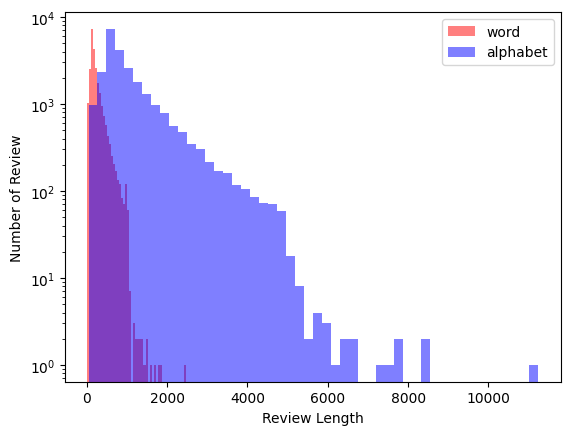

In [20]:
# 토큰을 시각화해서 앞의 토큰단위하고 비교 ,데이터간의 차이
import matplotlib.pyplot as plt
plt.hist(review_len_by_token,bins=50, alpha = 0.5, color = 'r',label='word')
plt.hist(review_len_by_token_len,bins=50, alpha = 0.5, color = 'b',label='alphabet')
plt.yscale('log')
plt.legend()
plt.xlabel('Review Length')
plt.ylabel("Number of Review")
plt.show()



In [24]:
import numpy as np
print(f"문장의 최대 길이:{np.max(review_len_by_token)}")
print(f"문장의 최소 길이:{np.min(review_len_by_token)}")
print(f"문장의 평균 길이:{np.mean(review_len_by_token)}")

# 표준편차 : 평균에서 떨어진 정도 높은표준편차는 문장길이의 분포가 넓다
print(f"문장의 표준편차 길이:{np.std(review_len_by_token)}")
# 중간길이(중위수) : 평균은 이상치에의해 왜곡될수 있어서
print(f"문장의 중위수 길이:{np.median(review_len_by_token)}")
# 1사 분위  : 하위 25%
print(f"문장의 하위25% 길이:{np.percentile(review_len_by_token,25)}")
# 3사 분위 : 상위 25%
print(f"문장의 상위25% 길이:{np.percentile(review_len_by_token,75)}")


문장의 최대 길이:2470
문장의 최소 길이:10
문장의 평균 길이:233.7872
문장의 표준편차 길이:173.72955740506563
문장의 중위수 길이:174.0
문장의 하위25% 길이:127.0
문장의 상위25 길이:284.0


In [ ]:
# 워드 클라우

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

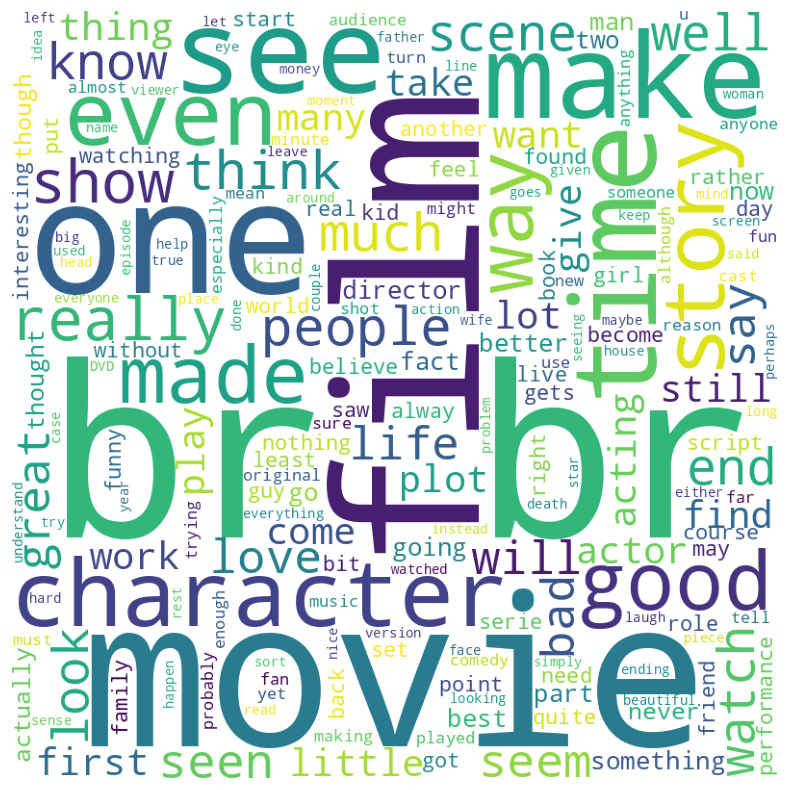

In [26]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white').generate(' '.join(train_df['review']))
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt

<function matplotlib.pyplot.show(close=None, block=None)>

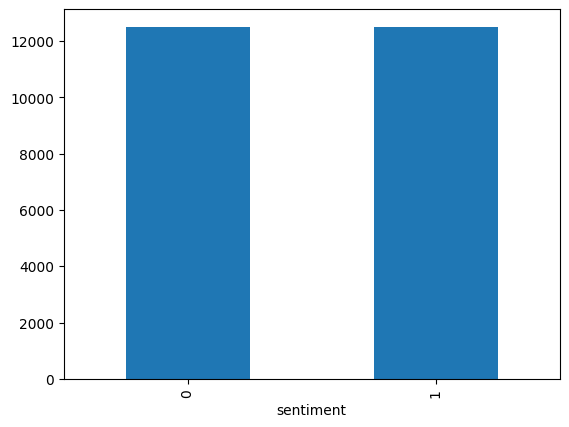

In [29]:
# 정답에 대한 갯수
import seaborn as sns
# sns.countplot(train_df['sentiment'])
# plt.show()
train_df['sentiment'].value_counts().plot(kind = 'bar')
plt.show


In [30]:
# 데이터크기
# 개수
# 각 문자의 길이 분포
# 많이 사용된 단어
# 긍정 부정의 분포
# 단어개수
# 특수문자 대소문자 비율

In [32]:
# https://drive.google.com/file/d/17D_3g7wyWxMaXEzedIdldS5CMVZLTVSg/view?usp=sharing
# https://drive.google.com/file/d/1M9GpaJgySwZvh0SbLMNPups0naE9XPiQ/view?usp=sharing
# https://drive.google.com/file/d/1DKpu5ckPpZBT37M19aJ0UZ-bWthUnjLU/view?usp=sharing

import gdown
file_id_list = ['17D_3g7wyWxMaXEzedIdldS5CMVZLTVSg','1M9GpaJgySwZvh0SbLMNPups0naE9XPiQ','1DKpu5ckPpZBT37M19aJ0UZ-bWthUnjLU']
for idx, filepath in enumerate(file_id_list):
  download_url = f'https://drive.google.com/uc?id={filepath}'
  gdown.download(download_url, f'data{idx}.zip', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=17D_3g7wyWxMaXEzedIdldS5CMVZLTVSg
To: /content/data0.zip
100%|██████████| 13.6M/13.6M [00:00<00:00, 83.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1M9GpaJgySwZvh0SbLMNPups0naE9XPiQ
To: /content/data1.zip
100%|██████████| 13.3M/13.3M [00:00<00:00, 123MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1DKpu5ckPpZBT37M19aJ0UZ-bWthUnjLU
From (redirected): https://drive.google.com/uc?id=1DKpu5ckPpZBT37M19aJ0UZ-bWthUnjLU&confirm=t&uuid=280de969-b9ad-4bb4-ab79-d1ea54ecc209
To: /content/data2.zip
100%|██████████| 27.2M/27.2M [00:00<00:00, 80.3MB/s]


In [ ]:
# 동시출현 행렬  : 고유단어 행렬 각 단어의 쌍이 문장에서 동시에 나타난 횟수
# 위도우 크기: 윈도우크기 기준으로 단어가 얼마나 자주 나타나는지.. 앞뒤로 2개까지 출현횟수
# 고양이가 나무에 올라갔다
# 고양이가 개를 쫓았다

# 단어간의 관계를 분석
#             고양이가  나무에  올라갔다  개를 쫓았다
# 고양이       0         1       0         1      0
# 나무에      0          0      1         0      0
# 올라갔다
# 개를
# 쫒았다

In [33]:
!unzip data0.zip

Archive:  data0.zip
  inflating: labeledTrainData.tsv    


In [34]:
!unzip data1.zip

Archive:  data1.zip
  inflating: testData.tsv            


In [35]:
!unzip data2.zip

Archive:  data2.zip
  inflating: unlabeledTrainData.tsv  


In [3]:
# 필드에 따옴표가 포함된경우에는 따로 처리하지 않고 그대로 사용 quoting=3
import pandas as pd
train_data = pd.read_csv('./unlabeledTrainData.tsv',delimiter='\t',quoting=3)
train_data.head()

,id,review
0,"""9999_0""","""Watching Time Chasers, it obvious that it was..."
1,"""45057_0""","""I saw this film about 20 years ago and rememb..."
2,"""15561_0""","""Minor Spoilers<br /><br />In New York, Joan B..."
3,"""7161_0""","""I went to see this film with a great deal of ..."
4,"""43971_0""","""Yes, I agree with everyone on this site this ..."


In [5]:
train_data.shape

(50000, 2)

<Axes: >

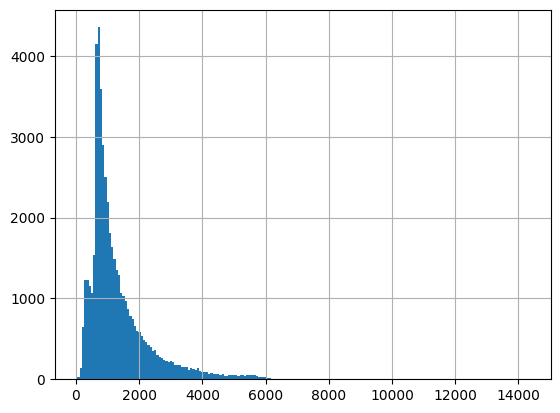

In [46]:
# 리뷰문자의 길이
train_length = train_data['review'].str.len()
train_length.head()
train_length.hist(bins=200,figsize=(12,5))


In [14]:
# 최대 최소 평균 표준편차 중위수 1사분위 4사분위
# 가장 많이 사용된 단어(토큰나이저) count  상위10개
# <br /> 제거
train_data_copy = train_data['review']
# 각 문장에서 알파벳 및 숫자와 공백만 포함해서 정규화
import re
train_data_copy = train_data_copy.apply(lambda x: re.sub('[^a-zA-Z0-9 ]','',x))
train_data_copy = train_data_copy.str.split()

from collections import Counter
c = Counter()
for data in train_data_copy.values:
  c.update(data)

c.most_common(10)



# 긍,부정 데이터 분포 - countplot
# 각 리뷰의 단어 개수 분포
# 특수문자 및 대,소문자비율 -
#################################
# 데이터 전처리

[('the', 581112),
 ('a', 313325),
 ('and', 312288),
 ('of', 289429),
 ('to', 266907),
 ('is', 211622),
 ('in', 174978),
 ('I', 138919),
 ('that', 133762),
 ('it', 128791)]

In [17]:
# 불용어 사전.. english.. korean
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
print(stopwords.words('english')[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
stop_words = set(stopwords.words('english'))
review = train_data_copy.values[0]
review = [word for word in review if not word in stop_words]
preprocess_review = []
for words in train_data_copy.values:
  review = [word for word in words if not word in stop_words]
  preprocess_review.append(review)

In [25]:
' '.join(preprocess_review[0])

'Watching Time Chasers obvious made bunch friends Maybe sitting around one day film school said Hey lets pool money together make really bad movie Or something like What ever said still ended making really bad moviedull story bad script lame acting poor cinematography bottom barrel stock music etc All corners cut except one would prevented films release Lifes like'

In [26]:
# 자연어 데이터 전처리
# 불필요한 토큰 제거(불용어, 특수기호등.. )
# 전부 소문자로 변경
# 다시 해당 단어를 문장을 결합(공백을 기준으로)

In [42]:
from bs4 import BeautifulSoup
sample = "abdfeff <br> <item> asdfadsfd </br> <item>"
temp = BeautifulSoup(sample, 'html5lib').get_text()
temp.split()

['abdfeff', 'asdfadsfd']

In [43]:
# 데이터로드
import pandas as pd
train_df = pd.read_csv('./labeledTrainData.tsv',delimiter='\t',quoting=3)
# html tag 제거
from bs4 import BeautifulSoup
train_df['review'] = train_df['review'].apply(lambda x: BeautifulSoup(x, 'html5lib').get_text())
# 모든 문자열은 소문자로 변화
train_df['review'] = train_df['review'].str.lower()
# 각 라인별 영문자및숫자만 존재하도록 정규화를 이용해서 수정
import re
train_df['review'] = train_df['review'].apply(lambda x: re.sub('[^a-z0-9 ]','',x))

# 각 라인별 문자열을 공백을 기준으로 토큰화(공백기준으로 split)
train_df['review'] = train_df['review'].str.split()
# 불용어(부사 전치사 등등)리스트를 가져와서 토큰중에 불용어가 아닌 토큰만 수집
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# 불용어가 아닌 토큰만 수집
train_df['review'] = train_df['review'].apply(lambda x: [ word for word in x if word not in stop_words] )
# 토큰들을 공백을 기준으로 합쳐
train_df['review'] = train_df['review'].apply(lambda x: ' '.join(x))

<ipython-input-43-52ad0b8067a3>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  train_df['review'] = train_df['review'].apply(lambda x: BeautifulSoup(x, 'html5lib').get_text())
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
# 단어빈도수 구하기
from collections import Counter
c = Counter()
for review in train_df['review'].values:
  c.update(review.split())
c.most_common(10)

[('movie', 41801),
 ('film', 37459),
 ('one', 25153),
 ('like', 19562),
 ('good', 14508),
 ('even', 12324),
 ('would', 12124),
 ('time', 11784),
 ('really', 11638),
 ('story', 11430)]